In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Task
Примените дерево решений к этому датасету и посмотрите, что оно сделает. Какой глубины получилось дерево?

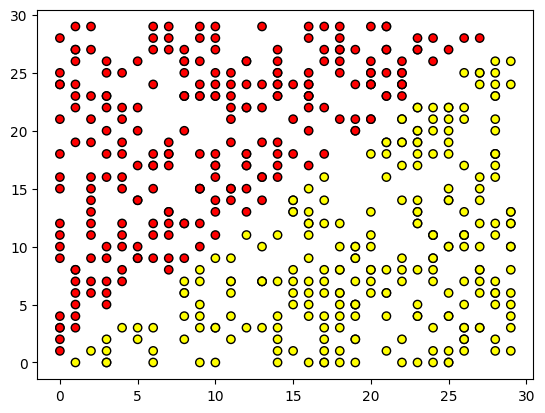

In [5]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)

In [18]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print('accuracy: ', accuracy_score(y_pred, y_test))
print('Глубина получившегося дерева: ',tree.tree_.max_depth)

accuracy:  0.9726027397260274
Глубина получившегося дерева:  6


''

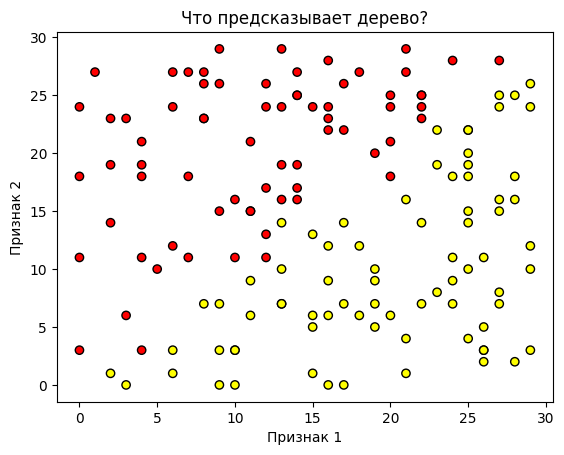

In [28]:

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='autumn', edgecolors='black')
plt.title('Что предсказывает дерево?')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', edgecolors='black')
;

## Построим график зависимости accuracy от глубины дерева

In [34]:
def get_train_and_test_accuracy(param_name, grid):
    '''
    Функция для оценки точности классификации
    для заданных значений параметра param_name

    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра
    '''

    train_acc, test_acc = [], []

    for param_value in grid:
        estimator = DecisionTreeClassifier(**{param_name: param_value})
        estimator.fit(X_train, y_train)
        train_acc.append(accuracy_score(y_train, estimator.predict(X_train)))
        test_acc.append(accuracy_score(y_test, estimator.predict(X_test)))
    return train_acc, test_acc
    
def plot_dependence(param_name, grid=range(2, 20), title=''):
    '''
    Функция для отображения графика зависимости accuracy
    от значения параметра c названием param_name

    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра,
    3) title - заголовок графика
    '''

    plt.figure(figsize=(12, 6))

    train_acc, test_acc = get_train_and_test_accuracy(param_name, grid)

    plt.plot(grid, train_acc, label='train', lw=3)
    plt.plot(grid, test_acc, label='test', lw=3)
    plt.legend(fontsize=14)
    plt.xlabel(param_name)
    plt.ylabel('Точность классификации')
    plt.title(title, fontsize=20)
    plt.show()

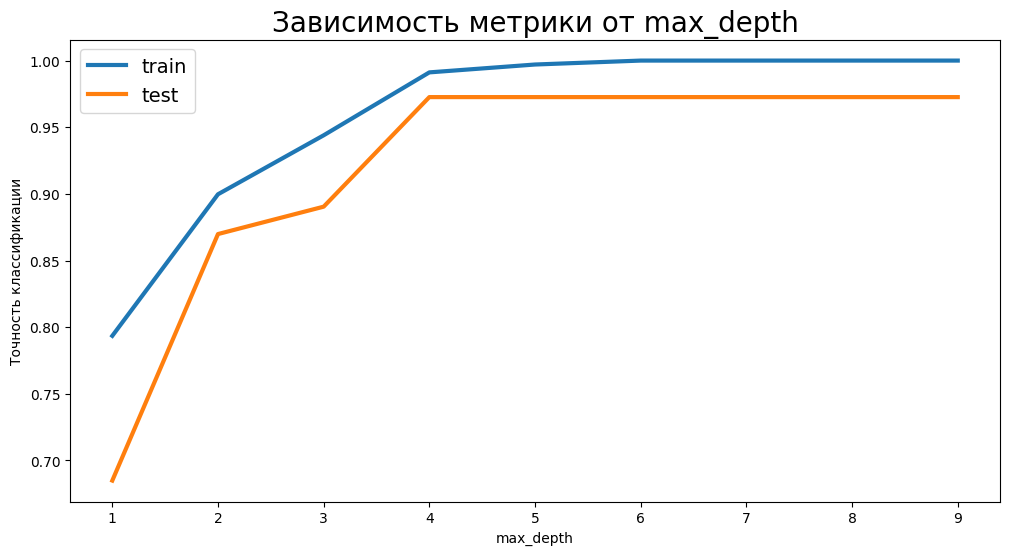

In [35]:
plot_dependence(
    'max_depth', range(1, 10),
    title='Зависимость метрики от max_depth'
)

*Из графика видно, что:* 
1. точность для test всегда меньше, чем для train
2. после глубины дерева 5 метрика выходит на плато
3. при маленькой глубине дерева метрика пропорционально низкая